## Introduction to Artificial Neural Networks (ANNs) with Keras

ANNs are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks such as classifying billions of images (Google Images), powering speech recognition (Siri), recommending best videos to watch (YouTube), etc.

__The Perceptron:__ One of the simplest ANN architectures, used for simple linear binary classification. The perceptron is based on a slightly different artificial neuron, called a _threshold logic unit_ (TLU) or sometime a _linear threshold unit_ LTU. The inputs and outputs are numbers, and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs (z = w1x1 + w2x2 + ... + wnxn = __xw__), then applies a step function to that sum and outputs the result: h(x) = step(z).

A perceptron is simply composed of a single layer of TLUs, with each each TLU connected to all the inputs.

Activation function: when the artificial neurons are TLU, the activation function is a step function.

Perceptrons are trained using a variant of Hebb's rule that takes into account the error made by the network when it makes a prediction. The Perceptron learning rule reinforces connections that help __reduce the error__.

_Perceptron Convergence Theorem:_ the decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns. However, if the training instances are linearly separable, the algorith will converge to a solution.

Scikit-Learn provides a Perceptron class that implements a single TLU network. It can be used, for example on the iris dataset:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] #petal length and petal width
y = (iris.target == 0).astype(np.int) #Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regressino over Perceptrons.

### Multilayer Perceptron (MLP)

An MLP is composed of one (passthrough) _input layer_, one or more layers of TLUs, called _hidden layers_, and one final layer of TLUs called the _output layer_. Every layer, except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN contains a deep stack of hidden layers, it is called a _deep neural network_ (DNN).

__Backpropgation Training Algorithm__: In short, it is a Gradient Descent using an efficient technique for computing the gradients automatically. In just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regard to every single model parameter. It can find out how each connection wieght and each bias term should be tweaked in order to reduce the error.

* It handles one mini-batch at a time and it goes through the full training set multiple times. Each pass is called an __epoc__

For each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

In order for this algorith to work properly, the step function (activation function) from the perceptron was replace with a logistic function. However the backpropation algorithm works well with many other activation functions such as the Hyperbolic Tangent function (goes from -1 to 1, instead of 0 to 1) and the Rectified Linear Unit function (ReLU(z) = max(0,z)). 

__Regression MLPs__

In general, when building an MLP for regression, you don't want to use any activation function for the output neurons, so they are free to  output any range of values. However, If you wish to guarantee that the output will always be positive, then a solution is to use the ReLU activation function in the output layer. If you wish to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent and then scale the labels to the appropriate range (0 to 1 or -1 to 1).

If you wish to predict a single value (e.g., the price of a house, given many of its features), then you need just a single output neuron. For multivariate regressions, you need one output neuron per output dimension.

The loss function to use during training is typically the mean squared error, but if the training dataset has a lot of outliers, then it might be better to use the mean absolute error instead. Alternatively, the Huber loss can be used, which is a combination of both.

__Classification MLPs__

For binary classification problem, a single output neuron using the logistic activation function is sufficient. However, MLPs can also easily handle multilabel binary classification tasks. More generally, one output layer will be dedicated to each positive class.

If each instance can belong only to a single class, out of 3 or more possible classes (e.g, classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and the softmax activation function for the whole output layer. The softmax function ensures that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive).

### DNNs  using TensorFlow and Keras

In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


Let's build an Image Classifier using the sequential API. We will use the Fashion MNIST dataset (70,000 grayscale images of 28 x 28 pixels each, with 10 classes), where the images represent fashion items.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
#Every image is represented as a 28 x 28 array rather than a 1D array of size 784 (as seen when using Sckit Learn)
print(X_train_full[1])

print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

Note that the dataset is already split into training and test set, but there is not validation set, so we will create one. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. We will scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (which also converts them to floats).

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_valid.shape)
print(y_valid.shape)
print(X_train.shape)
print(y_train.shape)

(5000, 28, 28)
(5000,)
(55000, 28, 28)
(55000,)


We need a list of class names to know what we are dealing with:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents a coat:

In [8]:
class_names[y_train[0]]

'Coat'

Now let's build the neural network. A classification MLP with two hidden layers:

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let's go through the code above line by line:

* The first line creates a sequential model. Neural networks composed of a single stack of layers connected sequentially.
* Next, the first layer is built. It is a Flaten later whose role is to convert each input into a 1D array
* Next, we add a dense layer with 300 neurons using the ReLU activation function
* Next, we add a dense layer with 100 neurons using the ReLU activation function
* Finally, a dense layer with 10 neurons is added (one per class), using the softmax function (because the classes are exclusive).

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


No that the __Dense__ layers often have a lot of parameters. For example, the first hidden layer has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters.

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer('dense') is hidden1

True

All parameters of a layer can be accessed using its __get_weights__ and __set_weights__.

In [14]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.06340361  0.04253816  0.06108993 ...  0.05727862 -0.00650916
  -0.04245513]
 [-0.04296289  0.01919089  0.02997608 ...  0.04913818  0.02898536
  -0.02846175]
 [ 0.0594091  -0.05994742  0.01612455 ... -0.03028896  0.0237131
   0.00215556]
 ...
 [ 0.02960813  0.01472542  0.02389619 ...  0.06080741 -0.01487159
  -0.01929121]
 [-0.06833835  0.04155441 -0.00203089 ...  0.07001236  0.00731625
   0.03979863]
 [-0.02575373 -0.0693486   0.0700984  ... -0.06424842  0.00592164
  -0.04464114]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Notice that the _Dense_ layer initialized the connection weights randomly (which is needed to break symmetry), and the biases were initialized to zeros, which is fine.

The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify __input_shape__ when creating the first layer of the Sequential model. However, if the user does not specify the the input shape, Keras will wait until it knows the input shape before it builds the model.

After a model is created you must call its compile() method to specify the loss function and the optimize to use.

We use "sparse_categorical_crossentropy" because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. Regarding the optimizer, Keras will use Stochastic Gradient Descent, or the so called, backpropagation). Finally, since it is a classifier, it is useful to measure accuracy during training and evaluation.

In [15]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

Now let's __train and evaluate__ the model:

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.7036 - accuracy: 0.7659 - val_loss: 0.5036 - val_accuracy: 0.8298
Epoch 2/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4879 - accuracy: 0.8289 - val_loss: 0.4526 - val_accuracy: 0.8472
Epoch 3/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4433 - accuracy: 0.8430 - val_loss: 0.4131 - val_accuracy: 0.8600
Epoch 4/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4152 - accuracy: 0.8551 - val_loss: 0.3963 - val_accuracy: 0.8638
Epoch 5/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3930 - accuracy: 0.8610 - val_loss: 0.3810 - val_accuracy: 0.8702
Epoch 6/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3781 - accuracy: 0.8666 - val_loss: 0.3699 - val_accuracy: 0.8724
Epoch 7/30
55000/55000 [==============================] -

We pass the input features (X_train) and the target classes (y_train), as well as the number of epochs to train. Keras will measure the loss and the extra metrics on this test set and at the end of each epoch. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and validation set).

__And that's it! The neural network is trained.__

We can see that the training loss went down and that the validation accuracy reached 89.10% after 30 epochs. That is not too far from the training accuracy (92.13%), so there does not seem to be much overfitting going on.

We can build now a learning curve. The mean training loss and accuracy measure over each epoch, and the mean validation loss and accuracy measured at the end of each epoch.

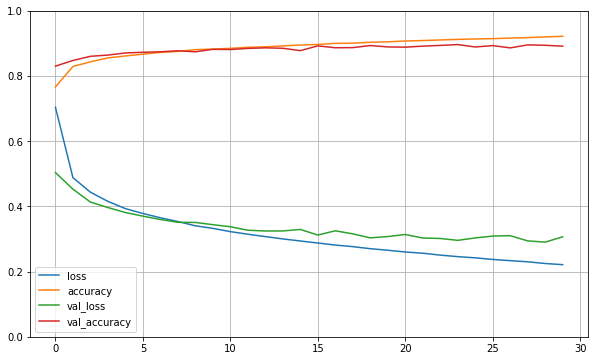

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

If the validation loss is still going down, the model has not quite converged yet and therefore you should continue training. It is a simple as calling the method fit() again, since Keras just continues training from where it left off. 

If you are not satisfied with your model you should go back and tune the hyperparameters.

Once you are satisfied with your model's validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production.

In [18]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[64.83100779476166, 0.8497]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example we did not do any hyperparameter optimization, so the lower accuracy is just bad luck!).

Now, let's use the model to make __predictions__:

In [19]:
X_new = X_test[:3] #since we don't have new instances we use the first 3 instances of the test set
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

From each instance, the model estimates the probability per class, from class 0 to 9.

If we only care about the class with the highest estimated probability (even if that probability is quite low), we can use the predict_classes() method:

* First instance = Ankle boot
* Second instance = Pullover
* Third instance = Trouser

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Here, the classifier actually classified all three images correctly:

In [22]:
y_new = y_test[:3]
print(y_new)

[9 2 1]
